# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [1]:
%pip install gym==0.26.2 matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827730 sha256=9c6cbdf53af009b65ac368f79072b801076b1d7acf442c9532d3cc7e9be0d820
  Stored in directory: /Users/rushilbhat/Library/Caches/pip/wheels/95/51/6c/9bb05ebbe7c5cb8171dfaa3611f32622ca4658d53f31c79077
Successfully built gym
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [gym]
Note: you may need to restart the kernel to use updated packages.


In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", is_slippery=True)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))

env1 = gym.make("FrozenLake-v1", is_slippery=False)
state_space_size1 = env1.observation_space.n
action_space_size1 = env1.action_space.n
Q1 = np.zeros((state_space_size1, action_space_size1))



## Training Loop
Complete the training loop

In [31]:
def train_agent(Q, episodes=2000, alpha0=0.8, gamma=0.95, epsilon=1.0, decay=0.995, lr_decay = 0.01, max_steps=100):
    rewards = []
    for ep in range(episodes):
        alpha = alpha0 / (1 + lr_decay * ep)
        state = env.reset()[0]
        done = False
        total_reward = 0
        steps = 0
        while not done and steps < max_steps:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _, _ = env.step(action)

            if done and reward == 0:
                reward = -1

            best_next = np.max(Q[next_state])
            Q[state, action] += alpha * (reward + gamma * best_next - Q[state, action])

            state = next_state
            total_reward += reward
            steps += 1

        epsilon *= decay
        rewards.append(total_reward)
    return rewards

## Plotting Results

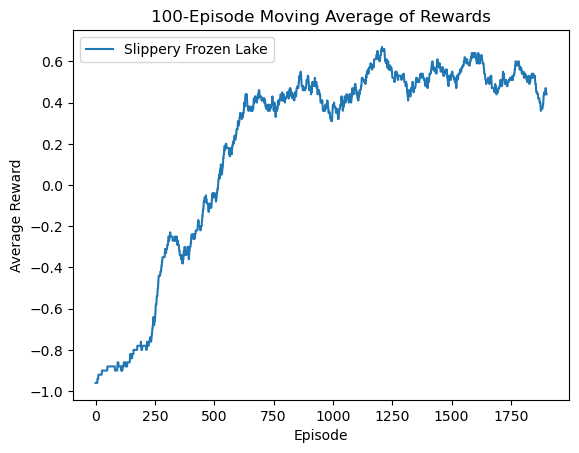

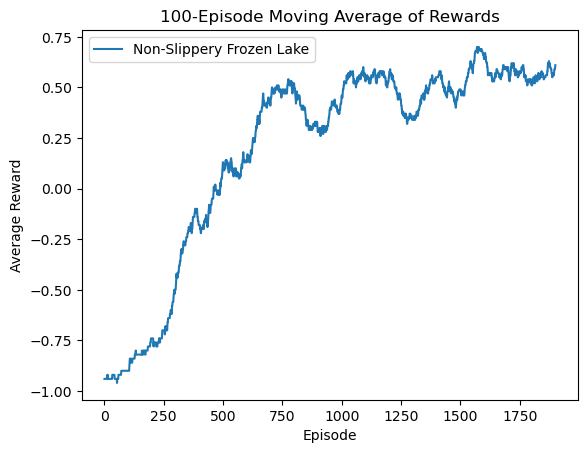

In [32]:
rewards = train_agent(Q)
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(["Slippery Frozen Lake"])
plt.show()

rewards1 = train_agent(Q1)
plt.plot(np.convolve(rewards1, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(["Non-Slippery Frozen Lake"])
plt.show()

## Test the Learned Policy

In [33]:
def test_agent(Q, episodes=5, max_steps=100):
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        steps = 0
        print(f"Episode {ep + 1}")
        while not done and steps < max_steps:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            env.render()
            state = next_state
            steps += 1

In [34]:
test_agent(Q)
test_agent(Q1)

Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5


/opt/anaconda3/lib/python3.12/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


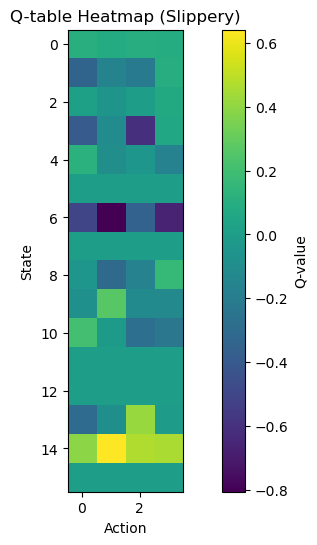

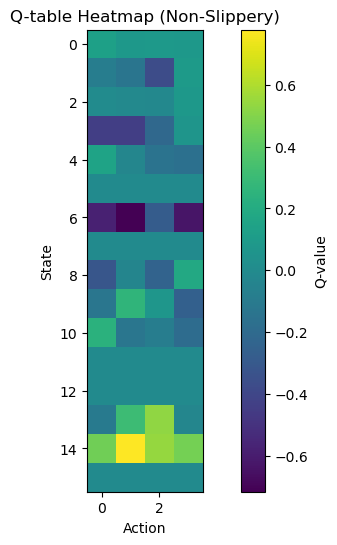

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_q_table(Q, title="Q-table Heatmap"):
    plt.figure(figsize=(10, 6))
    plt.imshow(Q)
    plt.colorbar(label="Q-value")
    plt.xlabel("Action")
    plt.ylabel("State")
    plt.title(title)
    plt.show()

plot_q_table(Q, title="Q-table Heatmap (Slippery)")
plot_q_table(Q1, title="Q-table Heatmap (Non-Slippery)")

## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


## TLDR

Learn how to implement tabular Q-learning to solve a simple environment. Use exploration, value updates, and reward tracking to build intuition before moving to deep RL.

